This exercise is about telling a compelling story about a dataset of interest. 

For this exercise, I've selected a dataset describing animal bites in the United States over a period of time beginning in 1985. This dataset is available on Kaggle:
https://www.kaggle.com/rtatman/animal-bites

I've decided to present the information to a non-technical audience, because animal bites are something that affects the general population, and this dataset doesn't include technical information. 


● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities? 
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask? 


In [314]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import datetime
from datetime import date

First, let's open the .csv as a dataframe, and display the first 5 rows to see what information is contained within. 

In [359]:
# open the csv file as dataframe
bite_data = pd.read_csv('AnimalBites.csv')
bite_data.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [316]:
bite_data.shape

(9003, 15)

This dataset includes more than 9000 instances of animal bites. Each record contains a date (year, month and day); type of animal, breed if available, sex of animal, color of animal, where the human was bitten, and some sparsely population information about vaccination and response. 
First, some light dataset cleaning - make sure the dates are dates, and that they happen after 1985 and before the present. 

In [317]:
bite_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9003 entries, 0 to 9002
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bite_date          8686 non-null   object 
 1   SpeciesIDDesc      8885 non-null   object 
 2   BreedIDDesc        3759 non-null   object 
 3   GenderIDDesc       6477 non-null   object 
 4   color              6426 non-null   object 
 5   vaccination_yrs    3738 non-null   float64
 6   vaccination_date   4115 non-null   object 
 7   victim_zip         7165 non-null   object 
 8   AdvIssuedYNDesc    2565 non-null   object 
 9   WhereBittenIDDesc  8387 non-null   object 
 10  quarantine_date    2020 non-null   object 
 11  DispositionIDDesc  1535 non-null   object 
 12  head_sent_date     395 non-null    object 
 13  release_date       1445 non-null   object 
 14  ResultsIDDesc      1543 non-null   object 
dtypes: float64(1), object(14)
memory usage: 1.0+ MB


In [318]:
bite_data.bite_date = pd.to_datetime(bite_data['bite_date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [319]:
type(bite_data.bite_date[1])

pandas._libs.tslibs.timestamps.Timestamp

What kind of animal is doing the biting?

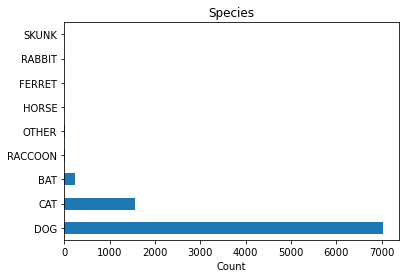

In [320]:
# plot count of bites for all time, separated by species
bite_data.SpeciesIDDesc.value_counts().plot(kind='barh')
#Give the plot a helpful title of 'Species'
plt.title('Species')
#Label the xaxis 'Count'
plt.xlabel('Count')
plt.show()

The great majority of the biting was done by domesticated animals. Cats make up about 15% of bites, but generally cat bites are not nearly as dangerous as dog bites. Let's look at the kind of dogs that are doing the biting. 

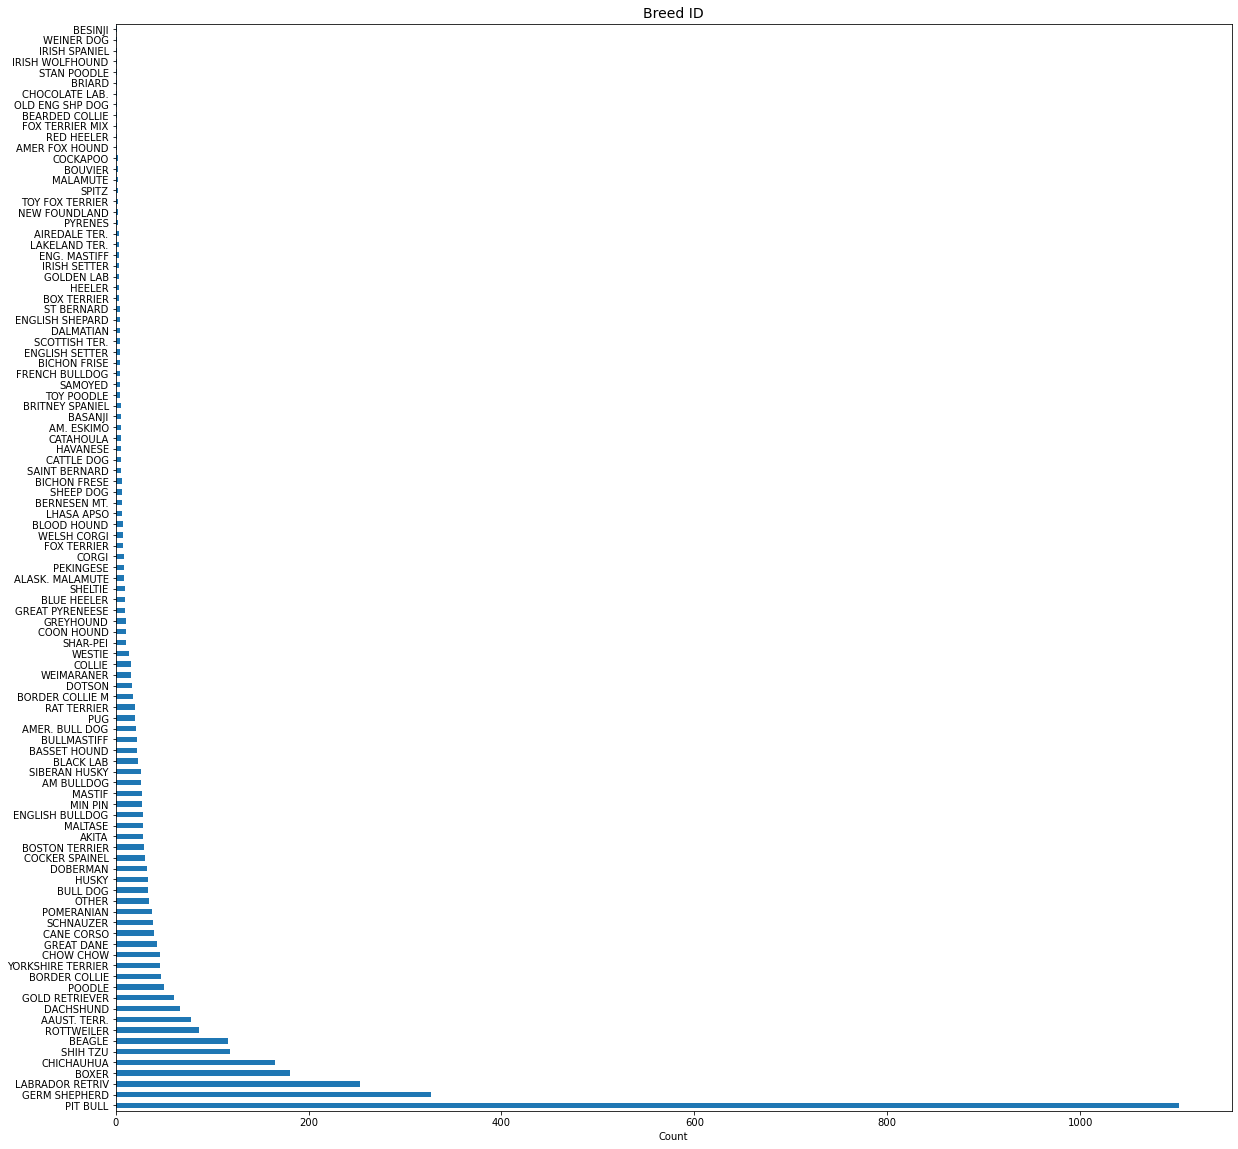

In [321]:
# Plot a count of bites by type of dog
bite_data.BreedIDDesc.value_counts().plot(kind='barh', figsize=(20, 20))
#Give the plot a helpful title of 'state'
plt.title('Breed ID', fontsize=14)
#Label the xaxis 'Count'
plt.xlabel('Count')
plt.show()

Many of the bites were done by Pit Bulls. Let's look at when the bites happen, over time. 

In [322]:
# drop the records which do not have dates and save the results into a new df
have_dates = bite_data.dropna(subset=['bite_date'], how='any')

In [323]:
# sort the dataframe and reset index
have_dates = have_dates.sort_values('bite_date')
have_dates.reset_index(inplace=True, drop=True)

Some of the dates are outside of a reasonable timeline; delete the entries that happened before 1985 and after the present day.

In [324]:
# Trim off dates outside reasonable bounds, found by previous data exploration
# Deleted that data exploration to keep this notebook simple
have_dates = have_dates.loc[2:8681]

Let's separate out the top 3 species - Dog, Cat and Bat - and plot them over time, selecting a period of time for which there was robust reporting. 

In [325]:
# set up 3 dfs for separate species and aggregate by month
ydog = have_dates[have_dates['SpeciesIDDesc'] == 'DOG'].set_index('bite_date').resample('MS').size()
ycat = have_dates[have_dates['SpeciesIDDesc'] == 'CAT'].set_index('bite_date').resample('MS').size()
ybat = have_dates[have_dates['SpeciesIDDesc'] == 'BAT'].set_index('bite_date').resample('MS').size()

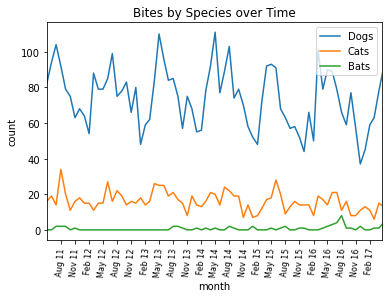

In [369]:
# plot all three lines on the same graph
ax = plt.axes()
plt.plot(ax=ax)
plt.plot(ydog, label='Dogs')
plt.plot(ycat, label='Cats')
plt.plot(ybat, label='Bats')
plt.xlim([pd.to_datetime('2011-05-05'), pd.to_datetime('2017-04-22')])
plt.xlabel('month')
plt.ylabel('count')
plt.legend()
ax.xaxis.set_major_formatter(dates.DateFormatter('%b %y'))
labels = ax.get_xticklabels()
plt.setp(labels, rotation=85, fontsize=8)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))
plt.title('Bites by Species over Time')
plt.show()

Bat bites seem to be very slightly increasing over time, with a slight increase every 6 months over so. Even with this slight increase, bat bites only approached the number of cat bites one time.

Cat bites seem to be slightly decreasing over time. 

Dog bites spike every summer, with the reports of bites in the summer often reaching twice the number of bites reported in the winter. 


Now that we know you are at the greatest risk of being bit by a dog in the summer, what kind of dog is most likely to bite you? Let's use a pie chart to find out. 

In [327]:
# Pie chart, pit bulls and german shepherds versus all others
t = bite_data[bite_data['SpeciesIDDesc'] == 'DOG']
t= t.dropna(subset=['BreedIDDesc'])
dogs = t.BreedIDDesc.unique()

In [350]:
# count occurrences a particular column
occur = t.groupby(['BreedIDDesc']).size().sort_values(ascending=False).to_frame()
# reanming the DataFrame columns
occur.rename(columns = {list(occur)[0]: 'Bite_counts'}, inplace = True)
occur.reset_index(inplace=True)
occur.head()

,BreedIDDesc,Bite_counts
0,PIT BULL,1101
1,GERM SHEPHERD,327
2,LABRADOR RETRIV,253
3,BOXER,181
4,CHICHAUHUA,165


In [351]:
df = t['BreedIDDesc'].value_counts(normalize=True).sort_values(ascending=False)
df.head()

PIT BULL           0.293209
GERM SHEPHERD      0.087084
LABRADOR RETRIV    0.067377
BOXER              0.048202
CHICHAUHUA         0.043941
Name: BreedIDDesc, dtype: float64

In [352]:
# Pie chart, top 5 bitey dogs versus all others
occur5 = occur[:5].copy()
print(occur5)

       BreedIDDesc  Bite_counts
0         PIT BULL         1101
1    GERM SHEPHERD          327
2  LABRADOR RETRIV          253
3            BOXER          181
4       CHICHAUHUA          165


In [353]:
#others
new_row = pd.DataFrame(data = {'BreedIDDesc':'OTHER',
    'Bite_counts' : [occur['Bite_counts'][5:].sum()]})

#combining top 5 with others
occur5 = pd.concat([occur5, new_row])
print(occur5)

       BreedIDDesc  Bite_counts
0         PIT BULL         1101
1    GERM SHEPHERD          327
2  LABRADOR RETRIV          253
3            BOXER          181
4       CHICHAUHUA          165
0            OTHER         1728


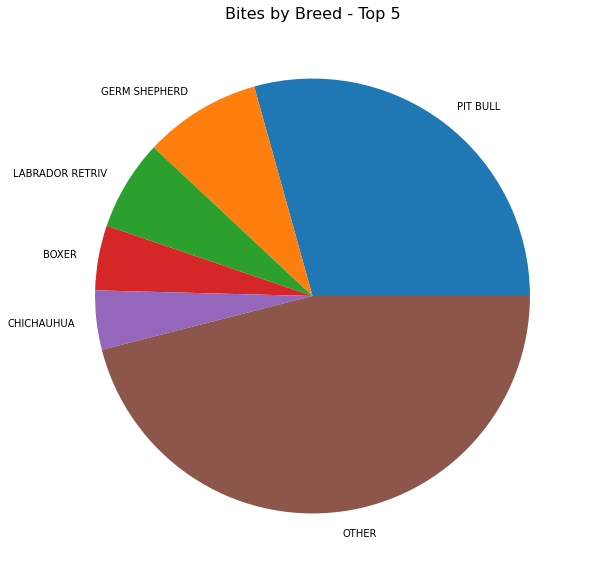

In [370]:


#plotting -- for comparison left all countries and right 
#the others combined
#fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
#df.plot(kind = 'pie', y = 'value', labels = df['breeds'], ax = axes[0])

occur5.plot(kind = 'pie', y = 'Bite_counts', labels = occur5['BreedIDDesc'], legend=False, figsize=(10,10))
plt.ylabel('')
#axes[0].set_title('all breeds')
plt.title('Bites by Breed - Top 5', fontsize=16)
plt.show()

# Pitbulls make up 29% of all bites, but comprise only 6.5% of all dogs in the United States.

(https://www.forbes.com/sites/niallmccarthy/2018/09/13/americas-most-dangerous-dog-breeds-infographic/?sh=4eb3b38162f8) 